In [1]:
from google.colab import drive
drive.mount('/content/google_drive')



Mounted at /content/google_drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
# file_path is the path where kaggle.json is present in the Google Drive


%cd /content
%pwd
%ls


/content
google_drive/  sample_data/


In [3]:
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
100% 1.33G/1.33G [00:35<00:00, 39.1MB/s]
100% 1.33G/1.33G [00:35<00:00, 40.4MB/s]


In [4]:
!unzip \*.zip  && rm *.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: img_align_celeba/img_align_celeba/197604.jpg  
  inflating: img_align_celeba/img_align_celeba/197605.jpg  
  inflating: img_align_celeba/img_align_celeba/197606.jpg  
  inflating: img_align_celeba/img_align_celeba/197607.jpg  
  inflating: img_align_celeba/img_align_celeba/197608.jpg  
  inflating: img_align_celeba/img_align_celeba/197609.jpg  
  inflating: img_align_celeba/img_align_celeba/197610.jpg  
  inflating: img_align_celeba/img_align_celeba/197611.jpg  
  inflating: img_align_celeba/img_align_celeba/197612.jpg  
  inflating: img_align_celeba/img_align_celeba/197613.jpg  
  inflating: img_align_celeba/img_align_celeba/197614.jpg  
  inflating: img_align_celeba/img_align_celeba/197615.jpg  
  inflating: img_align_celeba/img_align_celeba/197616.jpg  
  inflating: img_align_celeba/img_align_celeba/197617.jpg  
  inflating: img_align_celeba/img_align_celeba/197618.jpg  
  inflating: img_align_celeba/im

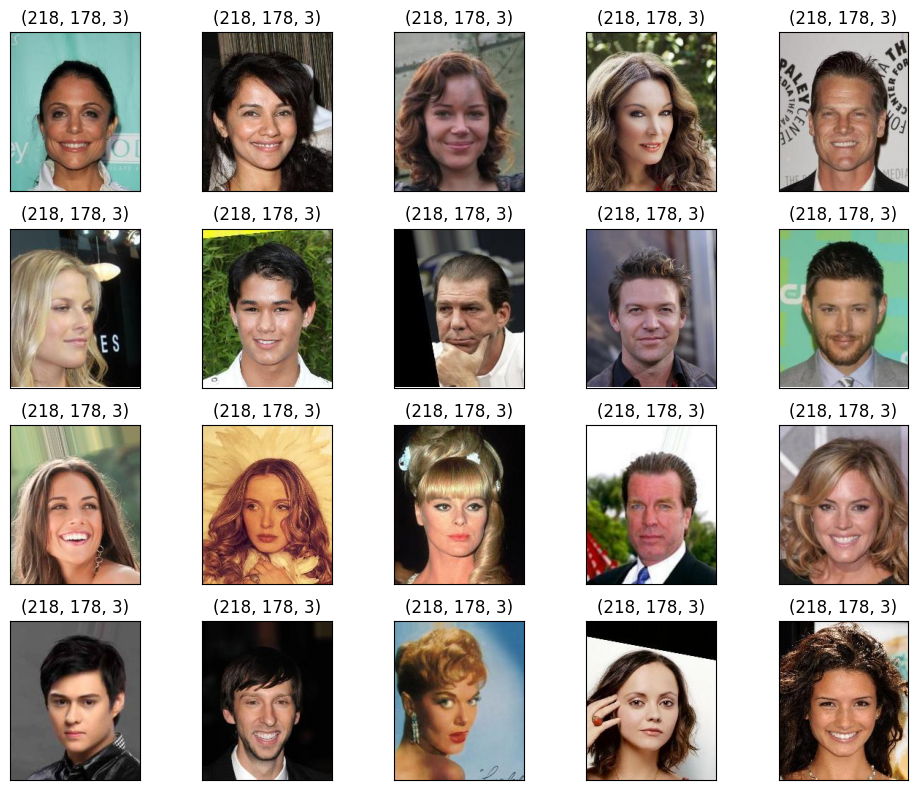

In [25]:

from glob import glob
from tqdm import tqdm
import tensorflow as tf
import keras
import keras.backend as K
from keras.initializers import RandomNormal
from keras.layers import Dense, Activation, LeakyReLU, BatchNormalization
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
filenames = np.array(glob('img_align_celeba/img_align_celeba/*.jpg'))
plt.figure(figsize=(10, 8))
for i in range(20):
    img = plt.imread(filenames[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(img.shape)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [63]:
X_train, X_test = train_test_split(filenames, test_size=1000)

In [66]:
def load_image(filename, size=(32, 32)):
    img = plt.imread(filename)
    # crop
    rows, cols = img.shape[:2]
    crop_r, crop_c = 150, 150
    start_row, start_col = (rows - crop_r) // 2, (cols - crop_c) // 2
    end_row, end_col = rows - start_row, cols - start_row
    img = img[start_row:end_row, start_col:end_col, :]
    # resize
   # img = np.resize(img, size)
    return img

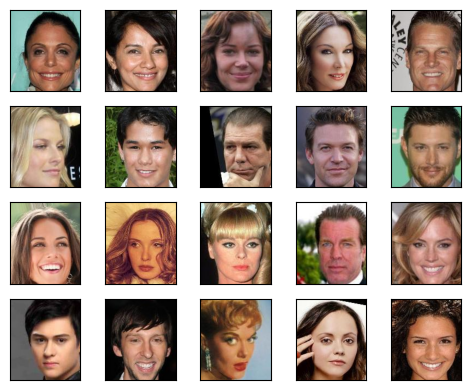

In [67]:
plt.figure(figsize=(5, 4))
for i in range(20):
    img = load_image(filenames[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [91]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchvision import transforms
from torchvision.transforms import *
from torchvision.utils import make_grid
import os
from PIL import Image

class Celeba_Dataset(Dataset):
    def __init__(self, path, max_num_samples = 200000):
        self.folder_path = path
        self.paths_list = os.listdir(self.folder_path)[:max_num_samples]
        self.trans = transforms.Compose([ToTensor(), Resize((64, 64)), Normalize(0, 1)])

    def __len__(self):
        return len(self.paths_list)

    def __getitem__(self, index):
        img_name = self.paths_list[index]
        img_path = os.path.join(self.folder_path, img_name)
        img_pil = Image.open(img_path)
        return self.trans(img_pil)


In [94]:
dataset = Celeba_Dataset('img_align_celeba/img_align_celeba')
train_loader = DataLoader(dataset, batch_size = 32, shuffle = True)
a = next(iter(train_loader))
a.shape

torch.Size([32, 3, 64, 64])

In [95]:
torch.Size([32, 3, 64, 64])

torch.Size([32, 3, 64, 64])

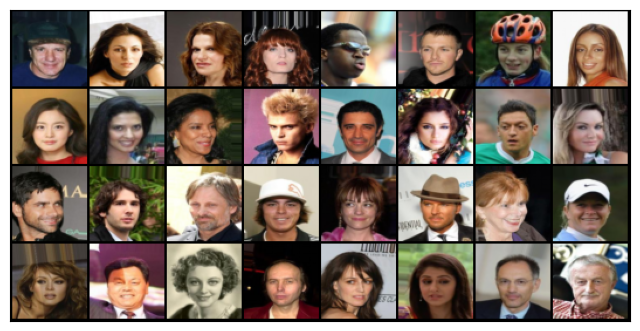

In [96]:
def show_images(a, N = 32):
    plt.figure(1, (8, 8))
    grid = make_grid(a[:N])
    grid = grid.numpy().transpose((1, 2, 0))
    plt.imshow(grid)
    plt.xticks([])
    plt.yticks([])
    plt.show()
show_images(a)

In [115]:
pip install torch

In [120]:
pip install torchvision

In [125]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Определение устройства (GPU если доступно, иначе CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется устройство: {device}")

# Параметры модели
batch_size = 128
latent_dim = 20  # Размер латентного пространства
epochs = 10
learning_rate = 1e-3

# Функция для фильтрации данных
def filter_digits(dataset, digits):
    indices = np.isin(dataset.targets, digits)
    return Subset(dataset, np.where(indices)[0])

# Загрузка набора данных MNIST
transform = transforms.ToTensor()

class Celeba_Dataset(Dataset):
    def __init__(self, path, max_num_samples = 200000):
        self.folder_path = path
        self.paths_list = os.listdir(self.folder_path)[:max_num_samples]
        self.trans = transforms.Compose([ToTensor(), Resize((64, 64)), Normalize(0, 1)])

    def __len__(self):
        return len(self.paths_list)

    def __getitem__(self, index):
        img_name = self.paths_list[index]
        img_path = os.path.join(self.folder_path, img_name)
        img_pil = Image.open(img_path)
        return self.trans(img_pil)

dataset = Celeba_Dataset('img_align_celeba/img_align_celeba')
train_loader = DataLoader(dataset, batch_size = 32, shuffle = True)
a = next(iter(train_loader))


# Обучающая выборка: цифры 0-4
#train_dataset_full = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
#train_dataset = filter_digits(train_dataset_full, digits=[0,1,2,3,4])

# Тестовая выборка: все цифры
test_dataset =  DataLoader(dataset, batch_size = 32, shuffle = True)

#train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Определение архитектуры VAE
class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()

        # Энкодер
        self.fc1 = nn.Linear(28*28, 400)
        self.fc_mu = nn.Linear(400, latent_dim)      # Среднее
        self.fc_logvar = nn.Linear(400, latent_dim)  # Логарифм дисперсии

        # Декодер
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, 28*28)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        mu = self.fc_mu(h1)
        logvar = self.fc_logvar(h1)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)  # Стандартное отклонение
        eps = torch.randn_like(std)  # Случайная нормальная шумовая переменная
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 28*28))
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z)
        return recon_x, mu, logvar

# Функция потерь для VAE
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 28*28), reduction='sum')

    # Kullback-Leibler дивергенция
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

    return BCE + KLD

# Инициализация модели и оптимизатора
model = VAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Функция обучения
def train(epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Эпоха {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} "
                  f"({100. * batch_idx / len(train_loader):.0f}%)]\tПотеря: {loss.item() / len(data):.4f}")

    print(f"====> Эпоха {epoch} Средняя потеря: {train_loss / len(train_loader.dataset):.4f}")

# Функция тестирования
def test(epoch):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for data, _ in test_loader:
            data = data.to(device)
            recon, mu, logvar = model(data)
            test_loss += loss_function(recon, data, mu, logvar).item()

    test_loss /= len(test_loader.dataset)
    print(f"====> Тестовая потеря: {test_loss:.4f}")

# Обучение модели
for epoch in range(1, epochs + 1):
    train(epoch)
    test(epoch)

# Генерация новых изображений
with torch.no_grad():
    z = torch.randn(64, latent_dim).to(device)
    sample = model.decode(z).cpu()

    # Визуализация сгенерированных изображений
    grid_img = torchvision.utils.make_grid(sample.view(64, 1, 28, 28), nrow=8)
    plt.figure(figsize=(8,8))
    plt.imshow(grid_img.permute(1, 2, 0).squeeze(), cmap='gray')
    plt.title("Сгенерированные изображения VAE")
    plt.axis('off')
    plt.show()

# Восстановление изображений из тестового набора
def visualize_reconstructions():
    model.eval()
    with torch.no_grad():
        data, _ = next(iter(test_loader))
        data = data.to(device)
        recon, _, _ = model(data)

        # Выбираем первые 8 изображений
        n = 8
        comparison = torch.cat([data[:n],
                                recon.view(batch_size, 1, 28, 28)[:n]])
        grid_img = torchvision.utils.make_grid(comparison, nrow=n)

        plt.figure(figsize=(16,4))
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy(), cmap='gray')
        plt.title("Исходные изображения (верх) и Восстановленные VAE (низ)")
        plt.axis('off')
        plt.show()

visualize_reconstructions()


Используется устройство: cpu


ValueError: too many values to unpack (expected 2)